In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [8]:
X,y,Xtest,ytest = np.load(open('../data/sample.pickle','rb'),encoding='latin1') 

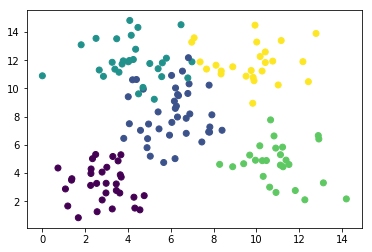

In [13]:
plt.scatter(X[:,0:1],X[:,1:2],c=y)

In [4]:
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A k x d matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    labels = np.unique(y)
    means = np.zeros([labels.shape[0],X.shape[1]])

    for i in range(labels.shape[0]):
        m = np.mean(X[np.where(y == labels[i])[0],],axis=0)
        means[i,] = m
    
    covmat = np.cov(X.transpose())
    return means,covmat

In [4]:
m,c = ldaLearn(X,y)

In [5]:
print(c)

[[ 10.85927241   1.22704893]
 [  1.22704893  14.32283255]]


In [14]:
def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A k x d matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    covmats = []
    labels = np.unique(y)
    means = np.zeros([labels.shape[0],X.shape[1]])

    for i in range(labels.shape[0]):
        m = np.mean(X[np.where(y == labels[i])[0],],axis=0)
        means[i,] = m
        covmats.append(np.cov(np.transpose(X[np.where(y == labels[i])[0],])))
    return means,covmats

In [6]:
def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels
    
    res = np.zeros((Xtest.shape[0],means.shape[0]))
    f = 1/np.sqrt((2*pi)**means.shape[1]*det(covmat))
    for j in range(means.shape[0]):
        res[:,j] = f * np.exp(-0.5*np.array([np.dot(np.dot((Xtest[i,:] - means[j,:]),inv(covmat)),np.transpose(Xtest[i,:] - means[j,:])) for i in range(Xtest.shape[0])]))

    ypred = np.argmax(res,axis=1) + 1
    res = (ypred == ytest.ravel())
    acc = len(np.where(res)[0])
    return float(acc)/len(ytest),ypred

In [15]:
def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels
    
    res = np.zeros((Xtest.shape[0],means.shape[0]))
    for j in range(means.shape[0]):
        f = 1/np.sqrt((2*pi)**means.shape[1]*det(covmats[j]))
        res[:,j] = f * np.exp(-0.5*np.array([np.dot(np.dot((Xtest[i,:] - means[j,:]),inv(covmats[j])),np.transpose(Xtest[i,:] - means[j,:])) for i in range(Xtest.shape[0])]))
    ypred = np.argmax(res,axis=1) + 1
    res = (ypred == ytest.ravel())
    acc = len(np.where(res)[0])
    return float(acc)/len(ytest),ypred

In [17]:
# Main script

# load the sample data                                                                 
X,y,Xtest,ytest = pickle.load(open('../data/sample.pickle','rb'),encoding='latin1') 
# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)

print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))
#print means
#print covmat


LDA Accuracy = 0.97
QDA Accuracy = 0.96


Text(0.5, 1.0, 'QDA')

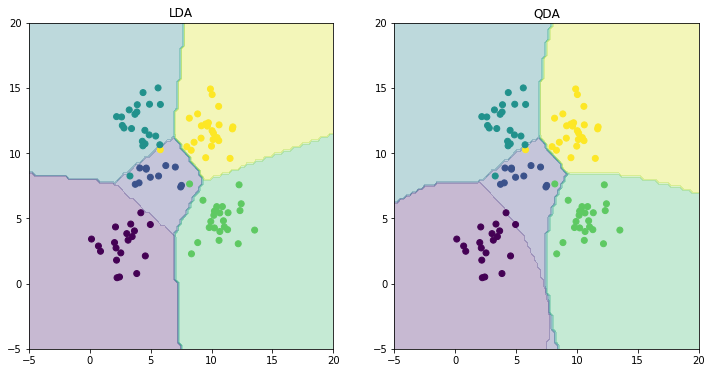

In [21]:
# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0:1],Xtest[:,1:],c=ytest)
plt.title('LDA')
plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0:1],Xtest[:,1:2],c=ytest)
plt.title('QDA')